In [1]:
import db

# Populariteit van liedjes uit een bepaalde decade door de jaren heen


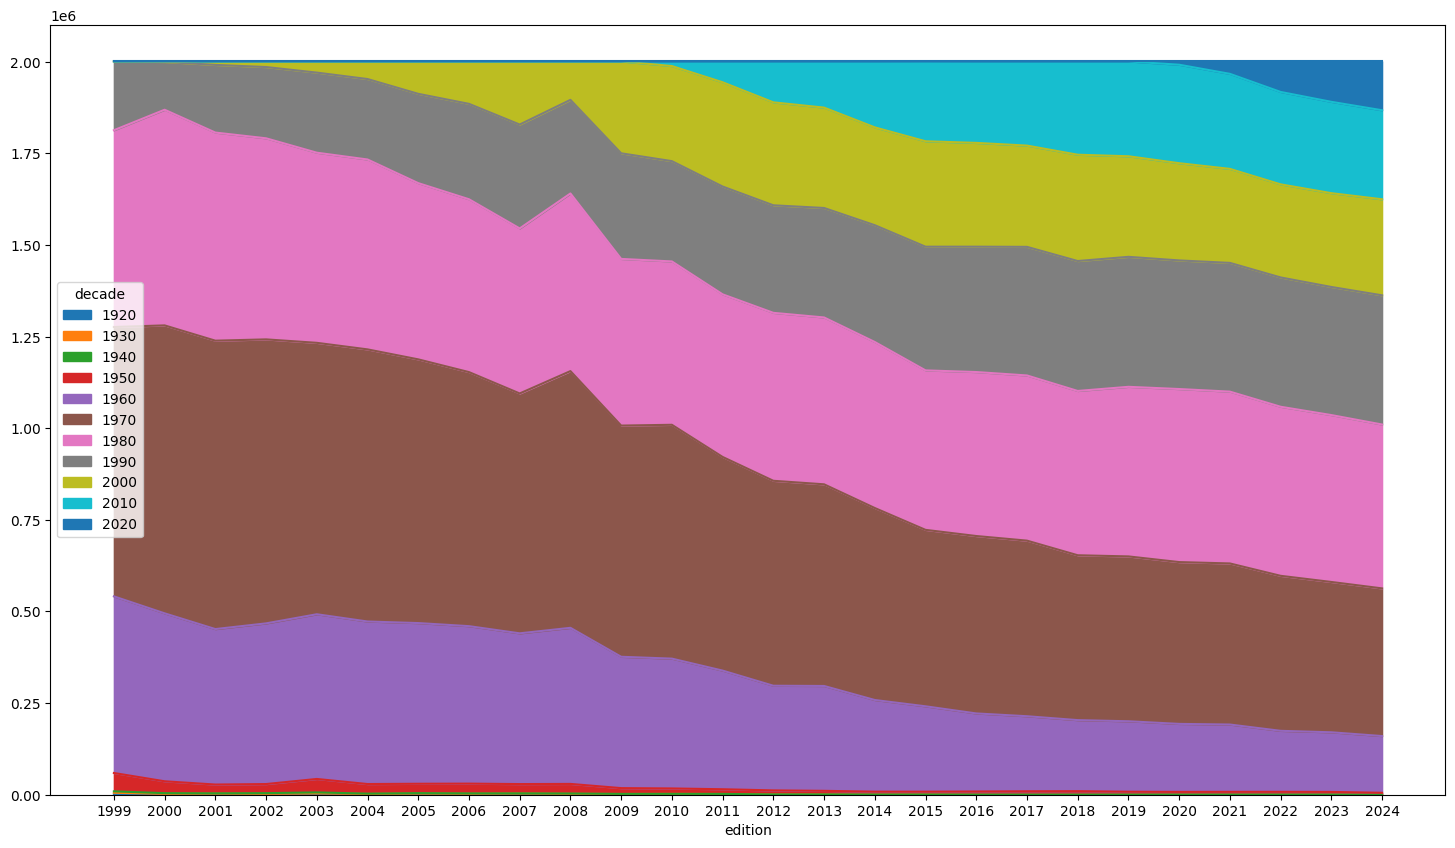

In [2]:
sql = """
SELECT O.edition, S.year/10 * 10 AS decade, SUM(2001-O.position) AS score
FROM Song S
INNER JOIN Occurance O ON o.song = S.rowid
GROUP BY edition, decade
"""
df = db.dataframe(sql).pivot(index='edition', columns='decade', values='score')

ax = df.plot.area(xticks=df.index, figsize=(18, 10))

# Leeftijd van liedjes door de jaren heen
De volgende plot laat zien hoe de gemiddelde leeftijd van liedjes zich ontwikkelt door de jaren heen. De blauwe lijn is de gemiddelde leeftijd van de liedjes van elke editie (gerekend van het jaar van die editie). De oranje lijn is de leeftijd geïndexeerd ten opzichte van de positie van dat liedje. Dus, liedjes hoger in de lijst hebben een grotere invloed. 

In [3]:
sql = """
SELECT O.edition, AVG(O.edition - O.year) AS avg_age, AVG((O.edition - O.year) * O.position) / 1000 AS age_popularity
FROM Occurance O
GROUP BY O.edition
"""
df = db.dataframe(sql)

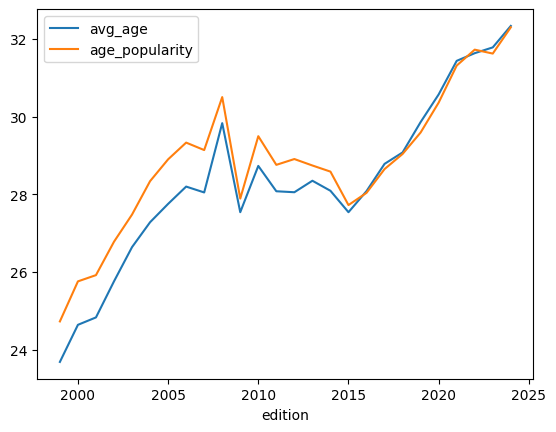

In [4]:
ax1 = df.plot.line(x='edition')

In [5]:
sql = """
SELECT O.edition, S.year/10 * 10 AS decade, SUM(2001-O.position) AS score, COUNT(S.rowid) AS aantal_songs, 
       MIN(O.position) AS hoogste 
FROM Song S
INNER JOIN Occurance O ON o.song = S.rowid
WHERE O.edition = 2018
GROUP BY edition, decade
"""
df = db.dataframe(sql)

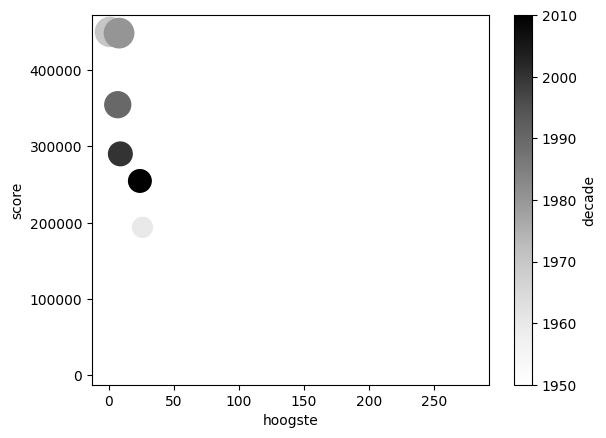

In [6]:

ax1 = df.plot.scatter(x='hoogste',
                       y='score',
                      s=df['aantal_songs'],
                       c='decade')

In [7]:
df

,edition,decade,score,aantal_songs,hoogste
0,2018,1950,9718,11,278
1,2018,1960,193865,205,26
2,2018,1970,449852,436,1
3,2018,1980,448306,448,8
4,2018,1990,354529,347,7
5,2018,2000,290096,289,9
6,2018,2010,254634,264,24
